In [1]:
import xarray as xr
import dask
import netCDF4
import matplotlib.pyplot as plt
import os
import glob
import rasterio
import rioxarray as rxr

### ERA5 STATISTICS

In [2]:
folder_single = r"C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics"

folder_land = r"C:\Users\Administrador\My Drive\ANDINA\derived-era5-land-daily-statistics-20251116T181420Z-1-002\derived-era5-land-daily-statistics"

files_single = sorted([os.path.join(folder_single, f) for f in os.listdir(folder_single) if f.endswith(".nc")])

files_land = sorted([os.path.join(folder_land, g) for g in os.listdir(folder_land) if g.endswith(".nc")])

for f in files_single:
    print(f)

for g in files_land:
    print(g)


C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics\2015_10m_u_component_of_wind_daily_mean.nc
C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics\2015_10m_v_component_of_wind_daily_mean.nc
C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics\2015_2m_temperature_daily_maximum.nc
C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics\2015_total_precipitation_daily_mean.nc
C:\Users\Administrador\My Drive\ANDINA\derived-era5-single-levels-daily-statistics-20251115T131018Z-1-001\derived-era5-single-levels-daily-statistics\2016_10m_u_component_of_wind_daily_mean.nc
C:\Users\Administrador\My Drive\ANDINA\derive

In [3]:
ds_all_single = xr.open_mfdataset(
    files_single,
    combine='by_coords',
    parallel=True,
    chunks={'latitude': 180, 'longitude': 180, 'valid_time': 50},
    compat="override",
    coords="minimal",
    data_vars="minimal"
)

ds_all_land = xr.open_mfdataset(
    files_land,
    combine='by_coords',
    parallel=True,
    chunks={'latitude': 180, 'longitude': 180, 'valid_time': 50},
    compat="override",
    coords="minimal",
    data_vars="minimal"
)


C:\Users\Administrador\anaconda3\envs\andina\Lib\site-packages\dask\_task_spec.py:758: UserWarning: The specified chunks separate the stored chunks along dimension "valid_time" starting at index 50. This could degrade performance. Instead, consider rechunking after loading.
  return self.func(*new_argspec, **kwargs)
C:\Users\Administrador\anaconda3\envs\andina\Lib\site-packages\dask\_task_spec.py:758: UserWarning: The specified chunks separate the stored chunks along dimension "longitude" starting at index 180. This could degrade performance. Instead, consider rechunking after loading.
  return self.func(*new_argspec, **kwargs)
C:\Users\Administrador\anaconda3\envs\andina\Lib\site-packages\dask\_task_spec.py:758: UserWarning: The specified chunks separate the stored chunks along dimension "valid_time" starting at index 50. This could degrade performance. Instead, consider rechunking after loading.
  return self.func(*new_argspec, **kwargs)
C:\Users\Administrador\anaconda3\envs\andina\L

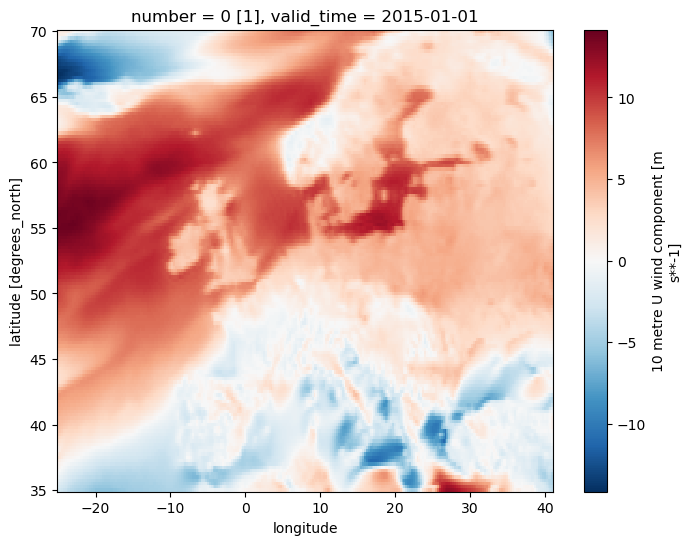

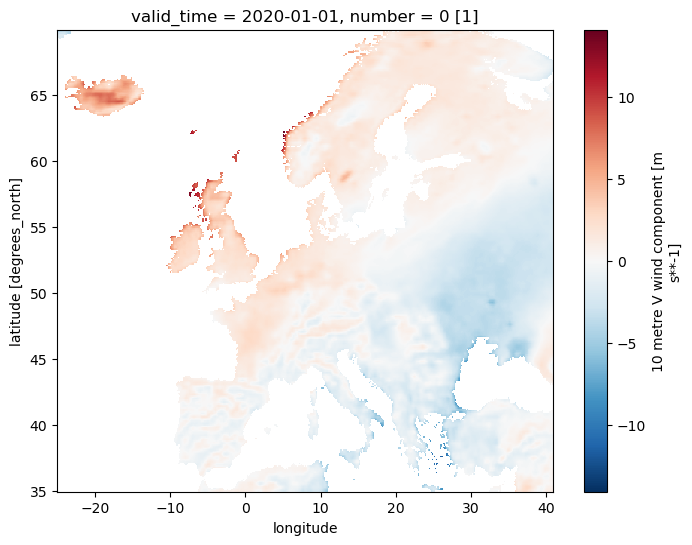

In [11]:
var_s = list(ds_all_single.data_vars)[0]
ds_all_single[var_s].isel(valid_time=0).plot(figsize=(8,6))

var_l = list(ds_all_land.data_vars)[0]
ds_all_land[var_l].isel(valid_time=0).plot(figsize=(8,6))


In [6]:
list(ds_all_single.data_vars)

['u10', 'v10', 't2m', 'tp']

In [7]:
list(ds_all_land.data_vars)

['v10', 'u10']

In [8]:
point['t2m'].plot(figsize=(12,4))


NameError: name 'point' is not defined

In [9]:
point['tp'].plot(figsize=(12,4))


NameError: name 'point' is not defined

In [10]:
import matplotlib.pyplot as plt

data = ds_all['t2m'].isel(valid_time=0)

plt.figure(figsize=(10,6))
data.plot()

# marcar Reggio Calabria
#plt.scatter(lon_rc, lat_rc, color="red", s=40)
#plt.text(lon_rc + 0.2, lat_rc, "Reggio Calabria", color="red")

plt.show()


NameError: name 'ds_all' is not defined

### SENTINEL NDVI 

In [ ]:
root_s3 = r"C:\Users\Administrador\My Drive\ANDINA\sentinel3"
root_s2 = r"C:\Users\Administrador\My Drive\ANDINA\sentinel2"

# buscar todos los tifs en todas las subcarpetas
s3 = glob.glob(os.path.join(root_s3, "sentinel3-olci-ndvi-*/**/*.tif"), recursive=True)
s2 = glob.glob(os.path.join(root_s2, "sentinel3-olci-ndvi-*/**/*.tif"), recursive=True)
"C:\Users\Administrador\My Drive\ANDINA\sentinel3\sentinel3-olci-ndvi-20251115T134600Z-1-001"
"C:\Users\Administrador\My Drive\ANDINA\sentinel3\sentinel3-olci-ndvi-20251115T134600Z-1-001"
"C:\Users\Administrador\My Drive\ANDINA\sentinel2\sentinel2_ndvi-20251116T181423Z-1-001"

len(s3), s3[:5]
len(s2), s2[:5]

In [ ]:
import rioxarray as rxr

file = files[0]
da = rxr.open_rasterio(file, masked=True)
da

In [ ]:
da.rio.crs

In [ ]:
da.coords

In [ ]:
import numpy as np

lat_rc = 38.114
lon_rc = 15.650

# obtener arrays de coordenadas si existen
lats = da['y'].values   # o da['lat']
lons = da['x'].values   # o da['lon']

# buscar índices más cercanos
row = np.argmin(np.abs(lats - lat_rc))
col = np.argmin(np.abs(lons - lon_rc))
row, col


In [ ]:
window = da.values[0, row-150:row+150, col-150:col+150]

plt.figure(figsize=(8,6))
plt.imshow(window, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar()
plt.title("NDVI alrededor de Reggio Calabria (correcto)")
plt.show()


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

root = r"C:\Users\Administrador\My Drive\ANDINA"
files = glob.glob(os.path.join(root, "sentinel3-olci-ndvi-*", "**", "*.tif"), recursive=True)
print("Total NDVI encontrados:", len(files))

# === 1. Calcular row/col usando el archivo que te funcionó ===
reference_file = files[0]
da = xr.open_rasterio(reference_file)

lat_rc = 38.114
lon_rc = 15.650

lats = da['y'].values        # coordenadas reales
lons = da['x'].values

row = np.argmin(np.abs(lats - lat_rc))
col = np.argmin(np.abs(lons - lon_rc))

print("Píxel objetivo:", row, col)

# === 2. Ventana fija ===
size = 150
r1, r2 = row-size, row+size
c1, c2 = col-size, col+size

# === 3. Graficar todas las imágenes NDVI ===
for f in files:
    da = xr.open_rasterio(f)
    ndvi = da.values[0]

    window = ndvi[r1:r2, c1:c2]

    plt.figure(figsize=(8,6))
    plt.imshow(window, cmap="RdYlGn", vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(os.path.basename(f))
    plt.show()


In [ ]:
import rioxarray as rxr
import numpy as np
import pandas as pd
import glob
import os

root_ndvi = r"C:\...\NDVI"
files_ndvi = sorted(glob.glob(os.path.join(root_ndvi, "*.tif")))

lat_rc = 38.114
lon_rc = 15.650

# usar un archivo de referencia
da0 = rxr.open_rasterio(files_ndvi[0])
lats = da0['y'].values
lons = da0['x'].values
row = np.argmin(np.abs(lats - lat_rc))
col = np.argmin(np.abs(lons - lon_rc))

ndvi_list = []

for f in files_ndvi:
    da = rxr.open_rasterio(f)
    ndvi = float(da.values[0, row, col])   # pixel puntual

    fecha = os.path.basename(f).split("_")[1]  # ajusta según tu nombre
    ndvi_list.append([fecha, ndvi])

ndvi_df = pd.DataFrame(ndvi_list, columns=["fecha", "ndvi"])
ndvi_df["fecha"] = pd.to_datetime(ndvi_df["fecha"])
ndvi_df = ndvi_df.sort_values("fecha")


In [ ]:
import rioxarray as rxr
import numpy as np
import pandas as pd
import os

ndvi_list = []

for f in files:
    da = rxr.open_rasterio(f)
    ndvi_val = float(da.values[0, row, col])

    # extraer fecha REAL del nombre
    name = os.path.basename(f)
    fecha_str = name.replace(".tif", "")[-8:]   # "20220101"
    fecha = pd.to_datetime(fecha_str, format="%Y%m%d")

    ndvi_list.append([fecha, ndvi_val])

ndvi_df = pd.DataFrame(ndvi_list, columns=["fecha", "ndvi"])
ndvi_df = ndvi_df.sort_values("fecha")


In [ ]:
ndvi_df

In [ ]:
import xarray as xr

# Ruta a tu NetCDF de temperatura
ds_temp = xr.open_dataset("ruta/era5_temperature.nc")

temp_df = (
    ds_temp.sel(latitude=lat_rc, longitude=lon_rc, method="nearest")
           ["t2m"]
           .to_dataframe()
           .reset_index()[["time","t2m"]]
)

temp_df.rename(columns={"time": "fecha"}, inplace=True)
temp_df["t2m"] = temp_df["t2m"] - 273.15     # Kelvin → Celsius
temp_df = temp_df.sort_values("fecha")
